<a href="https://colab.research.google.com/github/ashiqkareem/ict3204-coursework2/blob/main/ict3204_coursework2_packetbeat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Packetbeat - Cleaning T1595 Logs

In [327]:
# Import T1595 Packetbeat files
# /content/T1595 _ Packetbeat _ raw _ Grp12_MuhamadAfiq_YuXiang.csv
# /content/T1595_PacketbeatTraffic_raw_Gp14_EugeneChew.csv

import pandas as pd
import numpy as np

# Load up files into dataframes
df = pd.read_csv('/content/T1595 _ Packetbeat _ raw _ Grp12_MuhamadAfiq_YuXiang.csv')
df2 = pd.read_csv('/content/T1595_PacketbeatTraffic_raw_Gp14_EugeneChew.csv')

In [328]:
feature_columns = ['destination.bytes', # keep
 'destination.port', # keep
 'event.category', # keep
 'event.dataset', # keep
 'event.duration', # keep
 'event.kind', # keep
 'event.type', # keep
 'host.architecture', # keep
 'network.bytes', # keep
 'network.transport', # keep
 'network.type', # keep
 'source.bytes', # keep
 'source.port', # keep
 'type' # keep
]

In [24]:
len(feature_columns)

14

In [329]:
df.drop(df.columns.difference(feature_columns), 1, inplace=True)
df2.drop(df2.columns.difference(feature_columns), 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


# Packetbeat - Combining T1595 Logs

In [330]:
# T1595 logs
df = df.append(df2, ignore_index=True)

In [331]:
df = df[df['network.type'] == 'ipv4']
df

,destination.bytes,destination.port,event.category,event.dataset,event.duration,event.kind,event.type,host.architecture,network.bytes,network.transport,network.type,source.bytes,source.port,type
0,1.3KB,8080,network,http,1.7,event,"connection, protocol",x86_64,1.5KB,tcp,ipv4,235B,47952,http
1,1.3KB,8080,network,http,1.6,event,"connection, protocol",x86_64,1.5KB,tcp,ipv4,237B,47926,http
2,1.3KB,8080,network,http,1.6,event,"connection, protocol",x86_64,1.5KB,tcp,ipv4,237B,47920,http
3,1.3KB,8080,network,http,13.2,event,"connection, protocol",x86_64,1.4KB,tcp,ipv4,176B,47906,http
4,1.3KB,8080,network,http,2.0,event,"connection, protocol",x86_64,1.5KB,tcp,ipv4,235B,47892,http
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3019,116,80,network,flow,"507,400",event,connection,x86_64,370,tcp,ipv4,254,"48,720",flow
3020,116,80,network,flow,"507,400",event,connection,x86_64,370,tcp,ipv4,254,"48,720",flow
3021,116,80,network,flow,"507,400",event,connection,x86_64,370,tcp,ipv4,254,"48,720",flow
3022,116,80,network,flow,"507,400",event,connection,x86_64,370,tcp,ipv4,254,"48,720",flow


In [332]:
feature_columns = ['destination.bytes', # keep
 'destination.port', # keep
 'event.duration', # keep
 'network.bytes', # keep
 'network.transport', # keep
 'source.bytes', # keep
 'source.port', # keep
]

In [333]:
df.drop(df.columns.difference(feature_columns), 1, inplace=True)
df
# df.to_csv('/content/trial-combinedPacketbeat.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,destination.bytes,destination.port,event.duration,network.bytes,network.transport,source.bytes,source.port
0,1.3KB,8080,1.7,1.5KB,tcp,235B,47952
1,1.3KB,8080,1.6,1.5KB,tcp,237B,47926
2,1.3KB,8080,1.6,1.5KB,tcp,237B,47920
3,1.3KB,8080,13.2,1.4KB,tcp,176B,47906
4,1.3KB,8080,2.0,1.5KB,tcp,235B,47892
...,...,...,...,...,...,...,...
3019,116,80,"507,400",370,tcp,254,"48,720"
3020,116,80,"507,400",370,tcp,254,"48,720"
3021,116,80,"507,400",370,tcp,254,"48,720"
3022,116,80,"507,400",370,tcp,254,"48,720"


In [311]:
df2.drop(df2.columns.difference(feature_columns), 1, inplace=True)
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,destination.bytes,destination.port,event.duration,network.bytes,network.transport,source.bytes,source.port
0,-,"49,019",0,90,udp,90,123
1,-,"5,353",0,87,udp,87,"5,353"
2,-,7,0,74,tcp,74,"34,176"
3,-,2,0,74,tcp,74,"58,680"
4,-,3,0,74,tcp,74,"35,520"
...,...,...,...,...,...,...,...
2874,116,80,"507,400",370,tcp,254,"48,720"
2875,116,80,"507,400",370,tcp,254,"48,720"
2876,116,80,"507,400",370,tcp,254,"48,720"
2877,116,80,"507,400",370,tcp,254,"48,720"


# Actually Cleaning Logs

In [334]:
# converting transport to tcp = 1 and udp = 2 and icmp = 3
df['network.transport'] = df['network.transport'].replace(['tcp'], '1')
df['network.transport'] = df['network.transport'].replace(['udp'], '2')
df['network.transport'] = df['network.transport'].replace(['icmp'], '3')

# converting destination bytes
df['destination.bytes'] = df['destination.bytes'].str.replace('.', '')
df['destination.bytes'] = df['destination.bytes'].str.replace(',', '')
df['destination.bytes'] = df['destination.bytes'].str.replace('KB', '00')
df['destination.bytes'] = df['destination.bytes'].str.replace('MB', '000000')
df['destination.bytes'] = df['destination.bytes'].str.replace('B', '')

# converting destination bytes
df['network.bytes'] = df['network.bytes'].str.replace('.', '')
df['network.bytes'] = df['network.bytes'].str.replace(',', '')
df['network.bytes'] = df['network.bytes'].str.replace('KB', '00')
df['network.bytes'] = df['network.bytes'].str.replace('MB', '000000')
df['network.bytes'] = df['network.bytes'].str.replace('B', '')

# converting source bytes
df['source.bytes'] = df['source.bytes'].str.replace('.', '')
df['source.bytes'] = df['source.bytes'].str.replace(',', '')
df['source.bytes'] = df['source.bytes'].str.replace('KB', '00')
df['source.bytes'] = df['source.bytes'].str.replace('MB', '000000')
df['source.bytes'] = df['source.bytes'].str.replace('B', '')

# removing source | destination port
df['source.port'] = df['source.port'].str.replace(',', '')
df['destination.port'] = df['destination.port'].str.replace(',', '')
df['event.duration'] = df['event.duration'].str.replace(',', '')

# replacing - with 0
df = df.replace('-', 0)

# replacing NaN with 0
df = df.fillna(0)

# 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


In [322]:
# converting transport to tcp = 1 and udp = 2 and icmp = 3
df2['network.transport'] = df2['network.transport'].replace(['tcp'], '1')
df2['network.transport'] = df2['network.transport'].replace(['udp'], '2')
df2['network.transport'] = df2['network.transport'].replace(['icmp'], '3')

# converting destination bytes
df2['destination.bytes'] = df2['destination.bytes'].str.replace('.', '')
df2['destination.bytes'] = df2['destination.bytes'].str.replace(',', '')
df2['destination.bytes'] = df2['destination.bytes'].str.replace('KB', '00')
df2['destination.bytes'] = df2['destination.bytes'].str.replace('MB', '000000')
df2['destination.bytes'] = df2['destination.bytes'].str.replace('B', '')

# converting destination bytes
df2['network.bytes'] = df2['network.bytes'].str.replace('.', '')
df2['network.bytes'] = df2['network.bytes'].str.replace(',', '')
df2['network.bytes'] = df2['network.bytes'].str.replace('KB', '00')
df2['network.bytes'] = df2['network.bytes'].str.replace('MB', '000000')
df2['network.bytes'] = df2['network.bytes'].str.replace('B', '')

# converting source bytes
df2['source.bytes'] = df2['source.bytes'].str.replace('.', '')
df2['source.bytes'] = df2['source.bytes'].str.replace(',', '')
df2['source.bytes'] = df2['source.bytes'].str.replace('KB', '00')
df2['source.bytes'] = df2['source.bytes'].str.replace('MB', '000000')
df2['source.bytes'] = df2['source.bytes'].str.replace('B', '')

# removing source | destination port
df2['source.port'] = df2['source.port'].str.replace(',', '')
df2['destination.port'] = df2['destination.port'].str.replace(',', '')
df2['event.duration'] = df2['event.duration'].str.replace(',', '')

# replacing - with 0
df2 = df2.replace('-', 0)

# replacing NaN with 0
df2 = df2.fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


In [227]:
# Left with two columns to clean (bytes and transport)

# converting transport to tcp = 1 and udp = 2
df['network.transport'] = df['network.transport'].replace(['tcp'], '1')
df['network.transport'] = df['network.transport'].replace(['udp'], '2')

In [228]:
# converting destination bytes
df['destination.bytes'] = df['destination.bytes'].str.replace('.', '')
df['destination.bytes'] = df['destination.bytes'].str.replace(',', '')
df['destination.bytes'] = df['destination.bytes'].str.replace('KB', '00')
df['destination.bytes'] = df['destination.bytes'].str.replace('B', '')
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,destination.bytes,destination.port,event.duration,network.bytes,network.transport,source.bytes,source.port
0,1300,8080,1.7,1.5KB,1,235B,47952
1,1300,8080,1.6,1.5KB,1,237B,47926
2,1300,8080,1.6,1.5KB,1,237B,47920
3,1300,8080,13.2,1.4KB,1,176B,47906
4,1300,8080,2.0,1.5KB,1,235B,47892
...,...,...,...,...,...,...,...
140,1300,8080,39.9,1.4KB,1,187B,50398
141,1300,8080,40.9,1.4KB,1,176B,50302
142,1300,8080,44.8,1.4KB,1,187B,50374
143,1300,8080,47.1,1.4KB,1,176B,50410


In [229]:
# converting destination bytes
df['network.bytes'] = df['network.bytes'].str.replace('.', '')
df['network.bytes'] = df['network.bytes'].str.replace(',', '')
df['network.bytes'] = df['network.bytes'].str.replace('KB', '00')
df['network.bytes'] = df['network.bytes'].str.replace('B', '')
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,destination.bytes,destination.port,event.duration,network.bytes,network.transport,source.bytes,source.port
0,1300,8080,1.7,1500,1,235B,47952
1,1300,8080,1.6,1500,1,237B,47926
2,1300,8080,1.6,1500,1,237B,47920
3,1300,8080,13.2,1400,1,176B,47906
4,1300,8080,2.0,1500,1,235B,47892
...,...,...,...,...,...,...,...
140,1300,8080,39.9,1400,1,187B,50398
141,1300,8080,40.9,1400,1,176B,50302
142,1300,8080,44.8,1400,1,187B,50374
143,1300,8080,47.1,1400,1,176B,50410


In [230]:
# converting source bytes
df['source.bytes'] = df['source.bytes'].str.replace('.', '')
df['source.bytes'] = df['source.bytes'].str.replace(',', '')
df['source.bytes'] = df['source.bytes'].str.replace('KB', '00')
df['source.bytes'] = df['source.bytes'].str.replace('B', '')
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,destination.bytes,destination.port,event.duration,network.bytes,network.transport,source.bytes,source.port
0,1300,8080,1.7,1500,1,235,47952
1,1300,8080,1.6,1500,1,237,47926
2,1300,8080,1.6,1500,1,237,47920
3,1300,8080,13.2,1400,1,176,47906
4,1300,8080,2.0,1500,1,235,47892
...,...,...,...,...,...,...,...
140,1300,8080,39.9,1400,1,187,50398
141,1300,8080,40.9,1400,1,176,50302
142,1300,8080,44.8,1400,1,187,50374
143,1300,8080,47.1,1400,1,176,50410


In [335]:
# Labelling data
df['t1595'] = 1

df.head

<bound method NDFrame.head of      destination.bytes destination.port event.duration network.bytes  \
0                 1300                0              0          1500   
1                 1300                0              0          1500   
2                 1300                0              0          1500   
3                 1300                0              0          1400   
4                 1300                0              0          1500   
...                ...              ...            ...           ...   
3019               116               80         507400           370   
3020               116               80         507400           370   
3021               116               80         507400           370   
3022               116               80         507400           370   
3023               116               80         507400           370   

     network.transport source.bytes source.port  t1595  
0                    1          235           0 

In [321]:
# Labelling data
df2['t1595'] = 1

df2

,destination.bytes,destination.port,event.duration,network.bytes,network.transport,source.bytes,source.port,t1595
0,0,49019,0,90,2,90,123,1
1,0,5353,0,87,2,87,5353,1
2,0,7,0,74,1,74,34176,1
3,0,2,0,74,1,74,58680,1
4,0,3,0,74,1,74,35520,1
...,...,...,...,...,...,...,...,...
2874,116,80,"507,400",370,1,254,48720,1
2875,116,80,"507,400",370,1,254,48720,1
2876,116,80,"507,400",370,1,254,48720,1
2877,116,80,"507,400",370,1,254,48720,1


In [323]:
df2

,destination.bytes,destination.port,event.duration,network.bytes,network.transport,source.bytes,source.port,t1595
0,0,49019,0,90,2,90,123,1
1,0,5353,0,87,2,87,5353,1
2,0,7,0,74,1,74,34176,1
3,0,2,0,74,1,74,58680,1
4,0,3,0,74,1,74,35520,1
...,...,...,...,...,...,...,...,...
2874,116,80,507400,370,1,254,48720,1
2875,116,80,507400,370,1,254,48720,1
2876,116,80,507400,370,1,254,48720,1
2877,116,80,507400,370,1,254,48720,1


In [336]:
# converting all values to floats
# df.to_csv('/content/trial-combinedPacketbeat.csv')

df = df.astype(float)
df

,destination.bytes,destination.port,event.duration,network.bytes,network.transport,source.bytes,source.port,t1595
0,1300.0,0.0,0.0,1500.0,1.0,235.0,0.0,1.0
1,1300.0,0.0,0.0,1500.0,1.0,237.0,0.0,1.0
2,1300.0,0.0,0.0,1500.0,1.0,237.0,0.0,1.0
3,1300.0,0.0,0.0,1400.0,1.0,176.0,0.0,1.0
4,1300.0,0.0,0.0,1500.0,1.0,235.0,0.0,1.0
...,...,...,...,...,...,...,...,...
3019,116.0,80.0,507400.0,370.0,1.0,254.0,48720.0,1.0
3020,116.0,80.0,507400.0,370.0,1.0,254.0,48720.0,1.0
3021,116.0,80.0,507400.0,370.0,1.0,254.0,48720.0,1.0
3022,116.0,80.0,507400.0,370.0,1.0,254.0,48720.0,1.0


In [324]:

df2 = df2.astype(float)
df2

,destination.bytes,destination.port,event.duration,network.bytes,network.transport,source.bytes,source.port,t1595
0,0.0,49019.0,0.0,90.0,2.0,90.0,123.0,1.0
1,0.0,5353.0,0.0,87.0,2.0,87.0,5353.0,1.0
2,0.0,7.0,0.0,74.0,1.0,74.0,34176.0,1.0
3,0.0,2.0,0.0,74.0,1.0,74.0,58680.0,1.0
4,0.0,3.0,0.0,74.0,1.0,74.0,35520.0,1.0
...,...,...,...,...,...,...,...,...
2874,116.0,80.0,507400.0,370.0,1.0,254.0,48720.0,1.0
2875,116.0,80.0,507400.0,370.0,1.0,254.0,48720.0,1.0
2876,116.0,80.0,507400.0,370.0,1.0,254.0,48720.0,1.0
2877,116.0,80.0,507400.0,370.0,1.0,254.0,48720.0,1.0


# Packetbeat - Importing Non-T1595 logs

In [337]:
# seems to contain some bad lines
df3 = pd.read_csv('/content/packetbeat_raw_Gp5.csv', on_bad_lines='skip')
df4 = pd.read_csv('/content/combined_packetbeat_raw_Gp08_all.csv', on_bad_lines='skip')

# Comparing values in attack dataframe
benign = []

for i in feature_columns:
  if i in df4:
    pass
  else:
    benign.append(i)

benign

[]

In [338]:
df4 = df4[df4['network.type'] == 'ipv4']

In [339]:
df3.drop(df3.columns.difference(feature_columns), 1, inplace=True)
df4.drop(df4.columns.difference(feature_columns), 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [340]:
# Labelling data
df3['t1595'] = 0
df4['t1595'] = 0

df4

,destination.bytes,destination.port,event.duration,network.bytes,network.transport,source.bytes,source.port,t1595
0,526B,-,0.1,1KB,icmp,526B,-,0
1,531B,-,0.1,1KB,icmp,531B,-,0
2,523B,-,0.1,1KB,icmp,523B,-,0
3,419.9KB,9200,2696580.1,18.1MB,tcp,17.6MB,57852,0
4,190.8KB,9200,2600160.1,7.6MB,tcp,7.4MB,56882,0
...,...,...,...,...,...,...,...,...
495,-,50653,0.0,45B,udp,45B,50653,0
496,348B,53,0.4,680B,udp,332B,33349,0
497,-,34504,0.0,45B,udp,45B,34504,0
498,348B,53,0.0,680B,udp,332B,39437,0


# Packetbeat - Cleaning Non-T1595 Logs

In [343]:
# Left with two columns to clean (bytes and transport)

# converting transport to tcp = 1 and udp = 2 and icmp = 3
df3['network.transport'] = df3['network.transport'].replace(['tcp'], '1')
df3['network.transport'] = df3['network.transport'].replace(['udp'], '2')
df3['network.transport'] = df3['network.transport'].replace(['icmp'], '3')

# converting destination bytes
df3['destination.bytes'] = df3['destination.bytes'].str.replace('.', '')
df3['destination.bytes'] = df3['destination.bytes'].str.replace(',', '')
df3['destination.bytes'] = df3['destination.bytes'].str.replace('KB', '00')
df3['destination.bytes'] = df3['destination.bytes'].str.replace('MB', '000000')
df3['destination.bytes'] = df3['destination.bytes'].str.replace('B', '')

# converting destination bytes
df3['network.bytes'] = df3['network.bytes'].str.replace('.', '')
df3['network.bytes'] = df3['network.bytes'].str.replace(',', '')
df3['network.bytes'] = df3['network.bytes'].str.replace('KB', '00')
df3['network.bytes'] = df3['network.bytes'].str.replace('MB', '000000')
df3['network.bytes'] = df3['network.bytes'].str.replace('B', '')

# converting source bytes
df3['source.bytes'] = df3['source.bytes'].str.replace('.', '')
df3['source.bytes'] = df3['source.bytes'].str.replace(',', '')
df3['source.bytes'] = df3['source.bytes'].str.replace('KB', '00')
df3['source.bytes'] = df3['source.bytes'].str.replace('MB', '000000')
df3['source.bytes'] = df3['source.bytes'].str.replace('B', '')

# removing source | destination port
# df3['source.port'] = df3['source.port'].str.replace(',', '')
# df3['destination.port'] = df3['destination.port'].str.replace(',', '')
# df3['event.duration'] = df3['event.duration'].str.replace(',', '')

# replacing - with 0
df3 = df3.replace('-', 0)

# replacing NaN with 0
df3 = df3.fillna(0)

# 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


In [239]:
# Left with two columns to clean (bytes and transport)

# converting transport to tcp = 1 and udp = 2
df4['network.transport'] = df4['network.transport'].replace(['tcp'], '1')
df4['network.transport'] = df4['network.transport'].replace(['udp'], '2')
df4['network.transport'] = df4['network.transport'].replace(['icmp'], '3')

# converting destination bytes
df4['destination.bytes'] = df4['destination.bytes'].str.replace('.', '')
df4['destination.bytes'] = df4['destination.bytes'].str.replace(',', '')
df4['destination.bytes'] = df4['destination.bytes'].str.replace('KB', '00')
df4['destination.bytes'] = df4['destination.bytes'].str.replace('MB', '000000')
df4['destination.bytes'] = df4['destination.bytes'].str.replace('B', '')

# converting destination bytes
df4['network.bytes'] = df4['network.bytes'].str.replace('.', '')
df4['network.bytes'] = df4['network.bytes'].str.replace(',', '')
df4['network.bytes'] = df4['network.bytes'].str.replace('KB', '00')
df4['network.bytes'] = df4['network.bytes'].str.replace('MB', '000000')
df4['network.bytes'] = df4['network.bytes'].str.replace('B', '')

# converting source bytes
df4['source.bytes'] = df4['source.bytes'].str.replace('.', '')
df4['source.bytes'] = df4['source.bytes'].str.replace(',', '')
df4['source.bytes'] = df4['source.bytes'].str.replace('KB', '00')
df4['source.bytes'] = df4['source.bytes'].str.replace('MB', '000000')
df4['source.bytes'] = df4['source.bytes'].str.replace('B', '')

# # cleaning event duration
# df3['event.duration'] = df3['event.duration'].str.replace(',', '')

# removing dashes
df4 = df4.replace('-', 0)

df4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


,destination.bytes,destination.port,event.duration,network.bytes,network.transport,source.bytes,source.port,t1595
0,526,0,0.1,100,3,526,0,0
1,531,0,0.1,100,3,531,0,0
2,523,0,0.1,100,3,523,0,0
3,419900,9200,2696580.1,181000000,1,176000000,57852,0
4,190800,9200,2600160.1,76000000,1,74000000,56882,0
...,...,...,...,...,...,...,...,...
495,0,50653,0.0,45,2,45,50653,0
496,348,53,0.4,680,2,332,33349,0
497,0,34504,0.0,45,2,45,34504,0
498,348,53,0.0,680,2,332,39437,0


# Creating Dataset

In [344]:
df = df.append(df3, ignore_index=True)

df.head

<bound method NDFrame.head of       destination.bytes  destination.port  event.duration network.bytes  \
0                1300.0               0.0             0.0        1500.0   
1                1300.0               0.0             0.0        1500.0   
2                1300.0               0.0             0.0        1500.0   
3                1300.0               0.0             0.0        1400.0   
4                1300.0               0.0             0.0        1500.0   
...                 ...               ...             ...           ...   
12466                 4            6379.0             0.1            30   
12467                 5            6379.0             0.1            33   
12468          86000000           34570.0       1605894.7      89000000   
12469             63900            9200.0       1597012.5         48000   
12470              1500            9200.0        525759.7        177800   

      network.transport source.bytes  source.port  t1595  
0         

In [370]:
# df = df.drop('destination.port', axis=1)
df = df.drop('source.port', axis=1)

In [371]:
feature_columns = ['destination.bytes', # keep
#  'destination.port', # keep
 'event.duration', # keep
 'network.bytes', # keep
 'network.transport', # keep
 'source.bytes', # keep
#  'source.port', # keep
]

# Packetbeat - Building Model (Decision Tree)

In [345]:
# Import the Libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier # Import Random Forest Classifier

df

,destination.bytes,destination.port,event.duration,network.bytes,network.transport,source.bytes,source.port,t1595
0,1300.0,0.0,0.0,1500.0,1.0,235.0,0.0,1.0
1,1300.0,0.0,0.0,1500.0,1.0,237.0,0.0,1.0
2,1300.0,0.0,0.0,1500.0,1.0,237.0,0.0,1.0
3,1300.0,0.0,0.0,1400.0,1.0,176.0,0.0,1.0
4,1300.0,0.0,0.0,1500.0,1.0,235.0,0.0,1.0
...,...,...,...,...,...,...,...,...
12466,4,6379.0,0.1,30,1,26,48288.0,0.0
12467,5,6379.0,0.1,33,1,28,48288.0,0.0
12468,86000000,34570.0,1605894.7,89000000,1,297500,9200.0,0.0
12469,63900,9200.0,1597012.5,48000,1,416100,34568.0,0.0


In [372]:
df.shape

(12471, 6)

In [401]:
# Feature Selection
X = df.iloc[:, 0:5]
y = df.iloc[:, 5]

In [374]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.4)

In [245]:
# Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Decision Tree Classifier

In [375]:
# Building Decision Tree Model

dtClf = DecisionTreeClassifier()
dtClf = dtClf.fit(X_train, y_train)
y_pred = dtClf.predict(X_test)

In [376]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9997995590298657


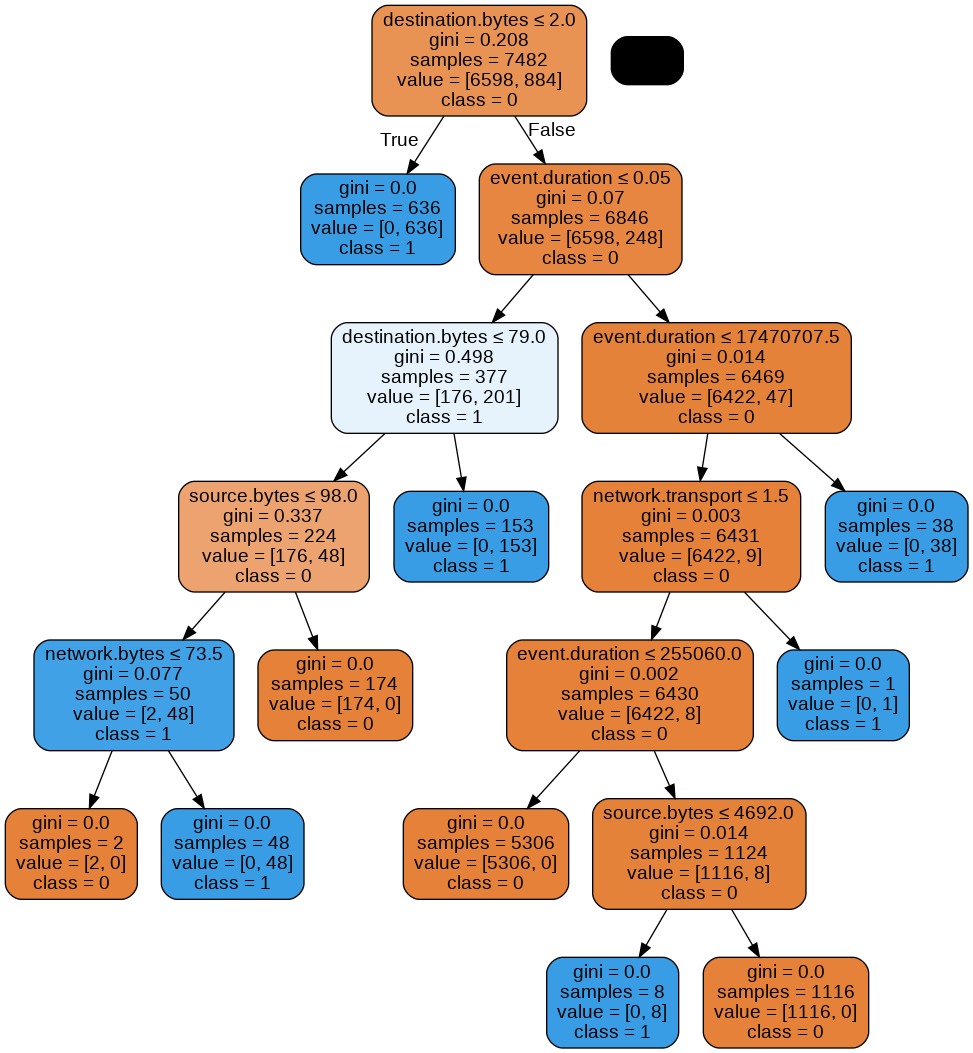

In [377]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dtClf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_columns, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('T1595.png')
Image(graph.create_png())

In [378]:
# Looking at feature importance
feature_imp = pd.Series(dtClf.feature_importances_,index=feature_columns).sort_values(ascending=False)
feature_imp

destination.bytes    0.765386
event.duration       0.174766
source.bytes         0.056106
network.bytes        0.002463
network.transport    0.001279
dtype: float64

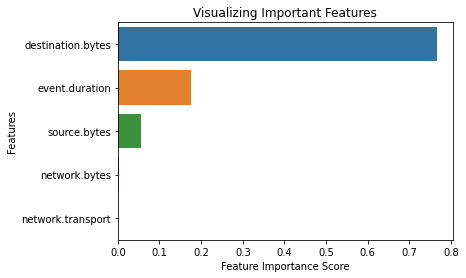

In [379]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# KNN Classifier

In [380]:
# importing modules required from sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [381]:
# # feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [382]:
# Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=13)

# train the model using the training set
knn.fit(X_train, y_train)

# predict the response for test dataset
y_pred = knn.predict(X_test)

In [383]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9973942673882542


In [384]:
# Generate the summary of the predictions (Classification Report) made by the classifier

print("Classification Report : \n\n")
print (classification_report(y_test, y_pred))

Classification Report : 


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4402
         1.0       0.99      0.99      0.99       587

    accuracy                           1.00      4989
   macro avg       0.99      0.99      0.99      4989
weighted avg       1.00      1.00      1.00      4989



Text(91.68, 0.5, 'Predicted Outcome')

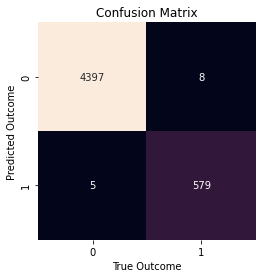

In [385]:
# Confusion Matrix generated

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('True Outcome')
plt.ylabel('Predicted Outcome')

In [386]:
# Choosing the best K Value (using elbow method)
error_rate = []
test_accuracy = []

for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))
  test_accuracy.append(accuracy_score(y_test, pred_i))

Text(0, 0.5, 'Error Rate')

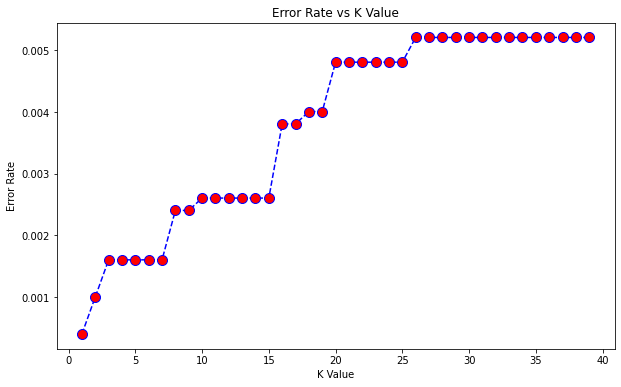

In [387]:
# Plotting graph depicting Error Rate vs K Value
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

# Testing Model with new Dataset

In [393]:
dfT = pd.read_csv('/content/T1595-T1570-T1020_Packetbeat_raw_Gp16_SimYewSiangMerrill-SimKaiChing-RachelWongSiHui-YeoHanJordan.csv')

In [394]:
dfT = dfT[dfT['network.type'] == 'ipv4']

In [395]:
dfT.drop(dfT.columns.difference(feature_columns), 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [396]:
dfT

,destination.bytes,event.duration,network.bytes,network.transport,source.bytes
0,76.1KB,1510016.4,437KB,tcp,360.8KB
1,212B,0.0,1.2KB,tcp,980B
2,75.7KB,1499776.3,433.5KB,tcp,357.9KB
3,212B,0.0,1.2KB,tcp,980B
4,75.2KB,1490053.3,431.4KB,tcp,356.2KB
...,...,...,...,...,...
492,54B,0.0,128B,tcp,74B
493,54B,0.0,128B,tcp,74B
494,54B,0.0,128B,tcp,74B
495,74B,0.0,280B,tcp,206B


In [398]:
# converting transport to tcp = 1 and udp = 2 and icmp = 3
dfT['network.transport'] = dfT['network.transport'].replace(['tcp'], '1')
dfT['network.transport'] = dfT['network.transport'].replace(['udp'], '2')
dfT['network.transport'] = dfT['network.transport'].replace(['icmp'], '3')

# converting destination bytes
dfT['destination.bytes'] = dfT['destination.bytes'].str.replace('.', '')
dfT['destination.bytes'] = dfT['destination.bytes'].str.replace(',', '')
dfT['destination.bytes'] = dfT['destination.bytes'].str.replace('KB', '00')
dfT['destination.bytes'] = dfT['destination.bytes'].str.replace('MB', '000000')
dfT['destination.bytes'] = dfT['destination.bytes'].str.replace('B', '')

# converting destination bytes
dfT['network.bytes'] = dfT['network.bytes'].str.replace('.', '')
dfT['network.bytes'] = dfT['network.bytes'].str.replace(',', '')
dfT['network.bytes'] = dfT['network.bytes'].str.replace('KB', '00')
dfT['network.bytes'] = dfT['network.bytes'].str.replace('MB', '000000')
dfT['network.bytes'] = dfT['network.bytes'].str.replace('B', '')

# converting source bytes
dfT['source.bytes'] = dfT['source.bytes'].str.replace('.', '')
dfT['source.bytes'] = dfT['source.bytes'].str.replace(',', '')
dfT['source.bytes'] = dfT['source.bytes'].str.replace('KB', '00')
dfT['source.bytes'] = dfT['source.bytes'].str.replace('MB', '000000')
dfT['source.bytes'] = dfT['source.bytes'].str.replace('B', '')

# removing source | destination port
# dfT['source.port'] = dfT['source.port'].str.replace(',', '')
# dfT['destination.port'] = dfT['destination.port'].str.replace(',', '')
dfT['event.duration'] = dfT['event.duration'].str.replace(',', '')

# replacing - with 0
dfT = dfT.replace('-', 0)

# replacing NaN with 0
dfT = dfT.fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


In [399]:
dfT['t1595'] = 0

In [400]:
df = df.append(dfT, ignore_index=True)

In [402]:
# Feature Selection
X = df.iloc[:, 0:5]
y = df.iloc[:, 5]

In [406]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.4)

In [407]:
# Building Decision Tree Model

dtClf = DecisionTreeClassifier()
dtClf = dtClf.fit(X_train, y_train)
y_pred = dtClf.predict(X_test)

In [408]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


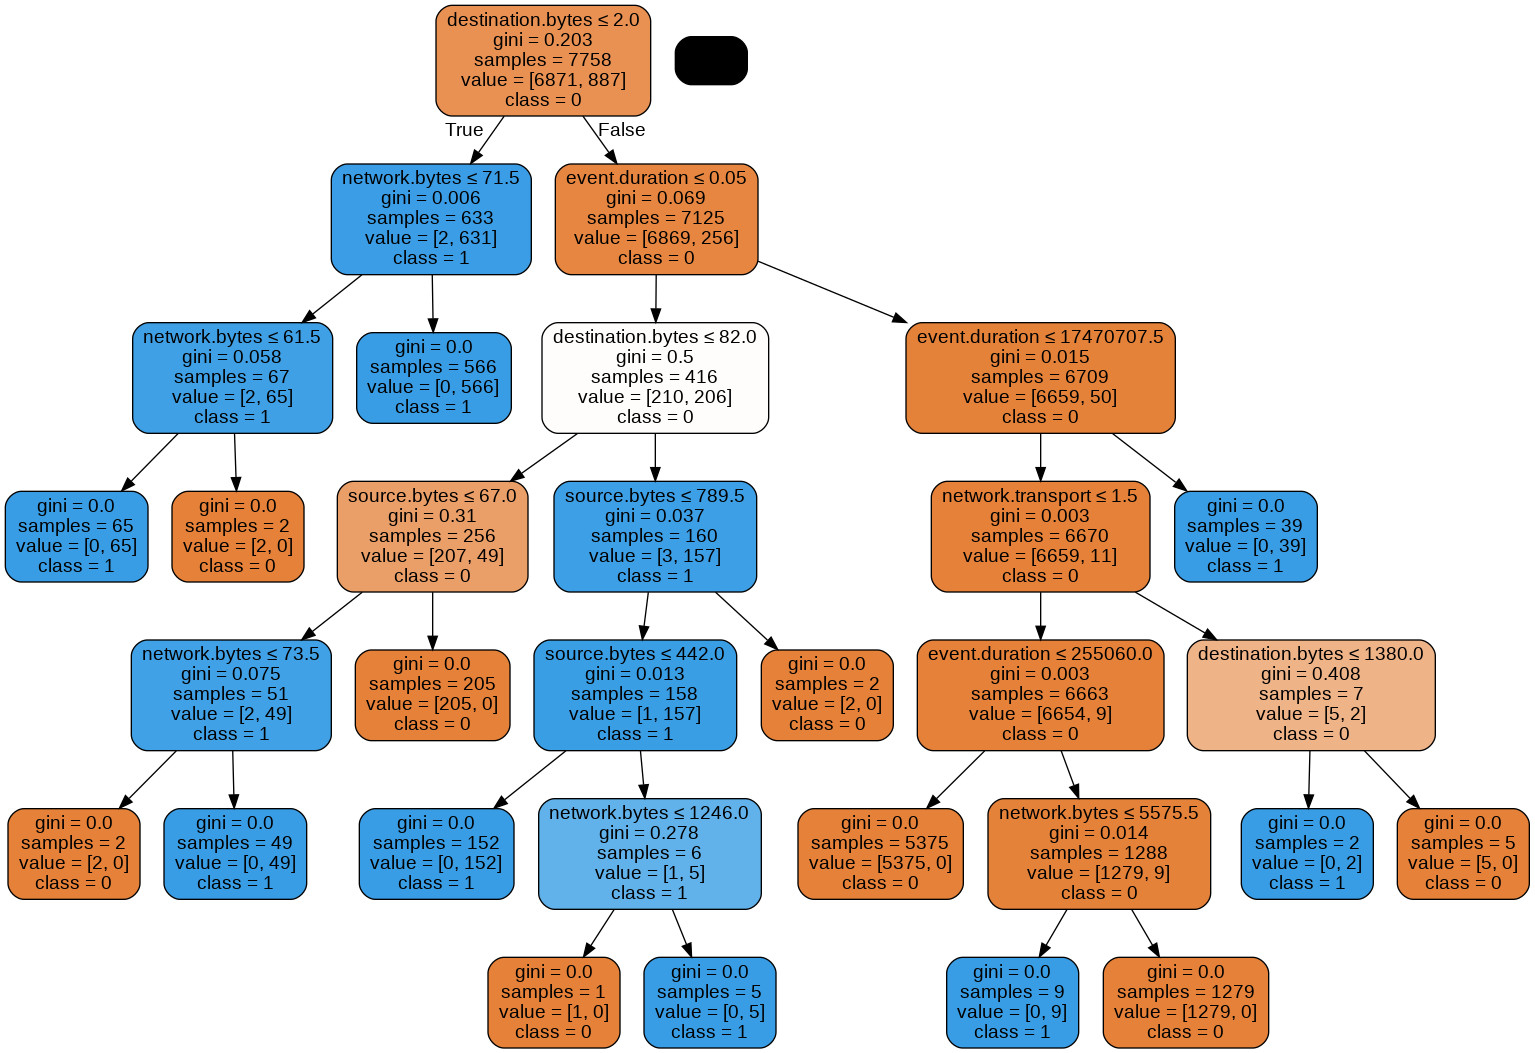

In [409]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dtClf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_columns, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('T1595.png')
Image(graph.create_png())

In [410]:
# Looking at feature importance
feature_imp = pd.Series(dtClf.feature_importances_,index=feature_columns).sort_values(ascending=False)
feature_imp

destination.bytes    0.763309
event.duration       0.167875
source.bytes         0.050675
network.bytes        0.017421
network.transport    0.000720
dtype: float64

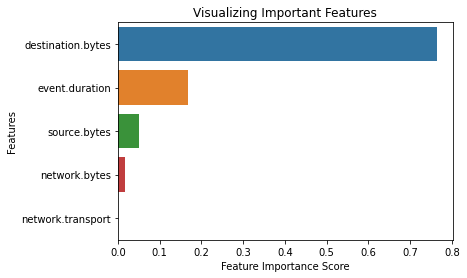

In [411]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [412]:
# # feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [413]:
# Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=13)

# train the model using the training set
knn.fit(X_train, y_train)

# predict the response for test dataset
y_pred = knn.predict(X_test)

In [414]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9957463263727765


In [415]:
# Generate the summary of the predictions (Classification Report) made by the classifier

print("Classification Report : \n\n")
print (classification_report(y_test, y_pred))

Classification Report : 


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4588
         1.0       0.98      0.98      0.98       584

    accuracy                           1.00      5172
   macro avg       0.99      0.99      0.99      5172
weighted avg       1.00      1.00      1.00      5172



Text(91.68, 0.5, 'Predicted Outcome')

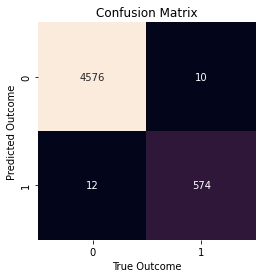

In [416]:
# Confusion Matrix generated

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('True Outcome')
plt.ylabel('Predicted Outcome')

In [417]:
# Choosing the best K Value (using elbow method)
error_rate = []
test_accuracy = []

for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))
  test_accuracy.append(accuracy_score(y_test, pred_i))

Text(0, 0.5, 'Error Rate')

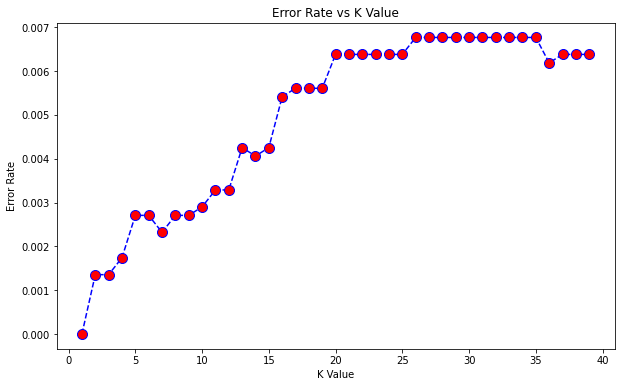

In [418]:
# Plotting graph depicting Error Rate vs K Value
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')